In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
from re import sub
from decimal import Decimal


In [41]:
df = pd.read_csv('../../ML/car-sense-Analytics/car_dataset_v4.csv', skiprows=1)
df.head(120)

,brand,model,year,max,min,adult passangers,weight,transmission,fuel,tank,...,bluetooth,android_auto/apple+play,cruise_control,cruise_control_advanced,blind_spot_alert,rain_sensor,car_tow,car_pull,body_type,segment
0,Toyota,Yaris,2024,"$388,700","$312,800",5,1035,A/S,Gas,40,...,yes,yes,yes,yes,yes,no,no,NaN,Sedan,Sedan-SmallSize
1,Toyota,Corolla,2024,"$529,900","$419,900",5,1405,A,Gas,50,...,yes,yes,yes,yes,yes,no,no,NaN,Sedan,Sedan-MidSize
2,Toyota,Cambry,2024,"$598,800","$571,900",5,1515,A,Gas,60.6,...,yes,yes,yes,yes,yes,no,no,NaN,Sedan,Sedan-Fullsize*
3,Toyota,Raize,2024,"$400,000","$378,400",5,1035,A/S,Gas,36,...,yes,yes,no,no,no,no,no,no,SUV,SUV-SmallSize
4,Toyota,Corolla Cross,2024,"$528,700","$528,700",5,1425,A,Gas,47,...,yes,yes,yes,yes,yes,no,no,yes,SUV,SUV-MidSize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Kia,Sportage,2024,"$594,900","$752,900",5,1540,A,Gas,54,...,yes,yes,yes,yes,yes,yes,no,no,SUV,SUV-FullSize
88,Kia,Sportage Hybrid,2024,"$872,900",NaN,5,1692,A,Gas/Hybrid,52,...,yes,yes,yes,yes,yes,yes,no,no,SUV,SUV-FullSize
89,Kia,Sorento,2024,"$821,900","$985,900",7,1783,A,Gas,67,...,yes,yes,yes,yes,yes,no,yes,yes,SUV,SUV-ExtendedSize
90,Kia,Telluride,2024,"$1,189,900",NaN,7,2036,A,Gas,71,...,yes,yes,yes,yes,yes,no,yes,yes,SUV,SUV-ExtendedSize


In [42]:
df_missin_percentange = 100 * df.isnull().sum()


In [43]:
def normalize_segments(raw_segment):
    segments = dict(
        city_values = ['Ciudad'],
        sed_s_values = ['Sedan-SmallSize'],
        sed_m_values = ['Sedan-MidSize', 'Sedan/MidSize/Hybrid'],
        sedan_f_values = ['Sedan-FullSize','Sedan-Fullsize*', 'Sedan-FullSize/Hybrid', 'Sedan-Fullsize'],
        suv_s_values = ['SUV-City', 'SUV-SmallSize'],
        suv_m_values = ['SUV-MidSize'] ,
        suv_f_values = ['SUV-Fullsize', 'SUV-Fullsize/Hybrid', 'SUV-FullSize'],
        suv_xl_values = ['SUV-ExtendedSize'],
        pu_s_values = ['Pickup-SmallSize'],
        pu_m_values = ['Pickup-MidSize'],
        pu_f_values = ['Pickup-FullSize/Hybrid', 'Pickup-FullSize'],
        mini_van_values = ['MiniVan', 'MiniVan/Hybrid']
        
    )
    for k, values in segments.items():
        try:
            if values.index(raw_segment) >= 0:
                return k[:-7]
        except ValueError:
            continue
    
    print('raw_segment: [{}]not found.'.format(raw_segment))
    return 'Not found'
  

In [44]:
df['segment_normalized'] = df['segment'].apply(normalize_segments)


raw_segment: [SUV-ExtendedSize/Hybrid]not found.
raw_segment: [SUV-ExtendedSize/Hybrid]not found.


In [45]:
def category_classifer(raw_segment):
    segments = dict(
        city_values = ['Ciudad'],
        sedan_values = [
            'Sedan-SmallSize', 'Sedan-MidSize', 'Sedan/MidSize/Hybrid', 
            'Sedan-FullSize','Sedan-Fullsize*', 'Sedan-FullSize/Hybrid', 'Sedan-Fullsize'
        ],
       
        suv_values = [
            'SUV-City', 'SUV-SmallSize', 'SUV-MidSize', 
            'SUV-Fullsize', 'SUV-Fullsize/Hybrid', 
            'SUV-FullSize','SUV-ExtendedSize'
        ],
       
        pu_values = ['Pickup-SmallSize', 'Pickup-MidSize', 'Pickup-FullSize/Hybrid', 'Pickup-FullSize', ],
        mini_van_values = ['MiniVan', 'MiniVan/Hybrid']
        
    )
    for k, values in segments.items():
        try:
            if values.index(raw_segment) >= 0:
                return k[:-7]
        except ValueError:
            continue
    
    print('category: [{}]not found.'.format(raw_segment))
    return 'Not found'

In [46]:
df['category'] = df['segment'].apply(category_classifer)
df.head()


category: [SUV-ExtendedSize/Hybrid]not found.
category: [SUV-ExtendedSize/Hybrid]not found.


,brand,model,year,max,min,adult passangers,weight,transmission,fuel,tank,...,cruise_control,cruise_control_advanced,blind_spot_alert,rain_sensor,car_tow,car_pull,body_type,segment,segment_normalized,category
0,Toyota,Yaris,2024,"$388,700","$312,800",5,1035,A/S,Gas,40,...,yes,yes,yes,no,no,NaN,Sedan,Sedan-SmallSize,sed_s,sedan
1,Toyota,Corolla,2024,"$529,900","$419,900",5,1405,A,Gas,50,...,yes,yes,yes,no,no,NaN,Sedan,Sedan-MidSize,sed_m,sedan
2,Toyota,Cambry,2024,"$598,800","$571,900",5,1515,A,Gas,60.6,...,yes,yes,yes,no,no,NaN,Sedan,Sedan-Fullsize*,sedan_f,sedan
3,Toyota,Raize,2024,"$400,000","$378,400",5,1035,A/S,Gas,36,...,no,no,no,no,no,no,SUV,SUV-SmallSize,suv_s,suv
4,Toyota,Corolla Cross,2024,"$528,700","$528,700",5,1425,A,Gas,47,...,yes,yes,yes,no,no,yes,SUV,SUV-MidSize,suv_m,suv


In [47]:
index_missing_values = df[df['dist_axis'].isna()][['brand','model']].index.values
df.iloc[index_missing_values]

,brand,model,year,max,min,adult passangers,weight,transmission,fuel,tank,...,cruise_control,cruise_control_advanced,blind_spot_alert,rain_sensor,car_tow,car_pull,body_type,segment,segment_normalized,category
18,Honda,BR-V,2024,"$519,900","$480,900",7,1297,A,Gas,42,...,yes,yes,yes,yes,no,yes,SUV,SUV-MidSize,suv_m,suv
48,Mazda,2,2024,"$288,900","$388,900",5,1613,A/S,Gas,44,...,yes,no,no,yes,no,NaN,Sedan,Sedan-SmallSize,sed_s,sedan
49,Mazda,2,2024,"$318,900","$388,900",5,1601,A/S,Gas,44,...,yes,no,no,yes,no,NaN,Hatchback,Ciudad,city,city
50,Mazda,3,2024,"$392,900","$542,900",5,1881,A/S,Gas,51,...,yes,yes,yes,yes,no,NaN,Sedan,Sedan-MidSize,sed_m,sedan
51,Mazda,3,2024,"$448,900","$558,900",5,1870,A,Gas,51,...,yes,yes,yes,yes,no,NaN,Hatchback,Sedan-SmallSize,sed_s,sedan
52,Mazda,CX-3,2024,"$380,900","$450,900",5,1762,A,Gas,48,...,yes,no,yes,yes,no,NaN,SUV,SUV-SmallSize,suv_s,suv
53,Mazda,CX-5,2024,"$558,900","$688,900",5,2115,A,Gas,56,...,yes,yes,yes,yes,no,NaN,SUV,SUV-MidSize,suv_m,suv
54,Mazda,CX-30,2024,"$459,900","$545,900",5,2042,A,Gas,51,...,yes,no,yes,yes,no,NaN,SUV,SUV-SmallSize,suv_s,suv
55,Mazda,CX-50,2024,"$805,900",NaN,5,2272,A,Gas,60,...,yes,yes,yes,yes,no,NaN,SUV,SUV-FullSize,suv_f,suv
56,Mazda,CX-90,2024,"$1,138,000",NaN,8,2918,A,Gas,74,...,yes,yes,yes,yes,no,NaN,SUV,SUV-ExtendedSize,suv_xl,suv


In [48]:

main_columns = ['brand', 'model']
filtered_df = df[df['dist_axis'].isna()]

df_groupby = df.groupby(['segment_normalized'])['dist_axis'].mean()




print('dist_axis missing values: {}'.format(df['dist_axis'].isnull().sum()))

def fill_missing_dist_axis(row):
    if np.isnan(row['dist_axis']):
        return df_groupby[row['segment_normalized']]
    else:
        return row['dist_axis']



df['dist_axis'] = df.apply(lambda row: fill_missing_dist_axis(row), axis=1)

print('dist_axis missing values: {}'.format(df['dist_axis'].isnull().sum()))
df['dist_axis'] 

dist_axis missing values: 17
dist_axis missing values: 0


0     2.60
1     2.70
2     2.80
3     2.50
4     2.60
      ... 
87    2.77
88    2.77
89    2.81
90    2.90
91    2.27
Name: dist_axis, Length: 92, dtype: float64

In [53]:
df.iloc[index_missing_values][['brand', 'model', 'dist_axis']]

,brand,model,dist_axis
18,Honda,BR-V,2.611000
48,Mazda,2,2.562500
49,Mazda,2,2.557500
50,Mazda,3,2.672000
51,Mazda,3,2.562500
52,Mazda,CX-3,2.572500
53,Mazda,CX-5,2.611000
54,Mazda,CX-30,2.572500
55,Mazda,CX-50,2.760333
56,Mazda,CX-90,3.198500


In [61]:


df['max_price'] = df['max'].apply(lambda x:Decimal(sub(r'[^\d.]', '', x) ))



In [62]:
df.columns


Index(['brand', 'model', 'year', 'max', 'min', 'adult passangers', 'weight',
       'transmission', 'fuel', 'tank', 'fuel_consumption', '4x4/awd',
       'big_volume_cargo', 'trunk_size', 'front_break', 'rear_break',
       'braking_assists', 'length', 'width', 'height', 'dist_axis',
       'height_to_the ground', 'front_airbags', 'side_airbags',
       'curtain_air_bags', 'knee_air_bags', 'tire_pressure_monitor', 'NCAP',
       'emergency_brake', 'reverse_camera', 'camera_360', 'bluetooth',
       'android_auto/apple+play', 'cruise_control ', 'cruise_control_advanced',
       'blind_spot_alert', 'rain_sensor', 'car_tow', 'car_pull', 'body_type',
       'segment', 'segment_normalized', 'category', 'max_price'],
      dtype='object')

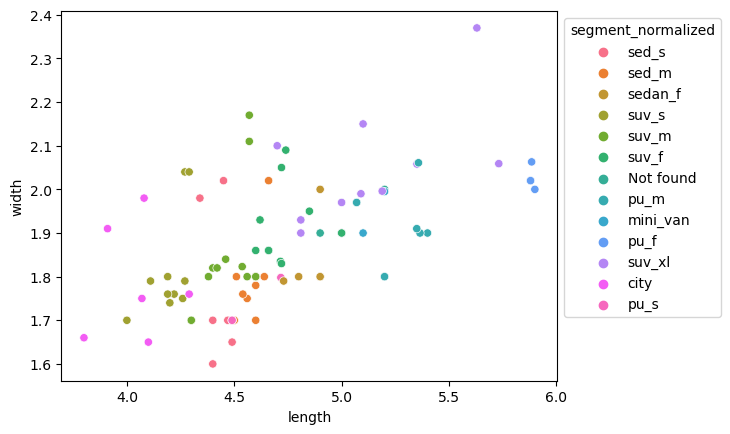

In [63]:

ax = sns.scatterplot(x='length', y='width', hue='segment_normalized', data=df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [64]:
df[['length', 'width', 'segment_normalized']]

,length,width,segment_normalized
0,4.40,1.60,sed_s
1,4.60,1.78,sed_m
2,4.80,1.80,sedan_f
3,4.00,1.70,suv_s
4,4.40,1.82,suv_m
...,...,...,...
87,4.66,1.86,suv_f
88,4.66,1.86,suv_f
89,4.81,1.90,suv_xl
90,5.00,1.97,suv_xl


In [65]:
df_suv_m = df[df['segment_normalized'] == 'suv_m']
df_suv_m = df_suv_m.sort_values(by=['length'])
df_suv_m.head()

,brand,model,year,max,min,adult passangers,weight,transmission,fuel,tank,...,cruise_control_advanced,blind_spot_alert,rain_sensor,car_tow,car_pull,body_type,segment,segment_normalized,category,max_price
10,Toyota,Avanza,2024,"$387,900","$354,700",7,1150,A/S,Gas,43,...,no,no,no,no,no,MiniVan,SUV-MidSize,suv_m,suv,387900
44,Nissan,Kicks,2024,"$426,000","$518,000",5,1177,A/S,Gas,41,...,no,yes,no,no,NaN,Hashback,SUV-MidSize,suv_m,suv,426000
86,Kia,Seltos,2024,"$460,900","$576,900",5,1409,A,Gas,50,...,no,yes,yes,no,no,SUV,SUV-MidSize,suv_m,suv,460900
4,Toyota,Corolla Cross,2024,"$528,700","$528,700",5,1425,A,Gas,47,...,yes,yes,no,no,yes,SUV,SUV-MidSize,suv_m,suv,528700
91,Kia,Niro,2024,"$727,900",NaN,5,1450,A,Gas/Hybrid,42,...,yes,yes,yes,no,no,SUV,SUV-MidSize,suv_m,suv,727900


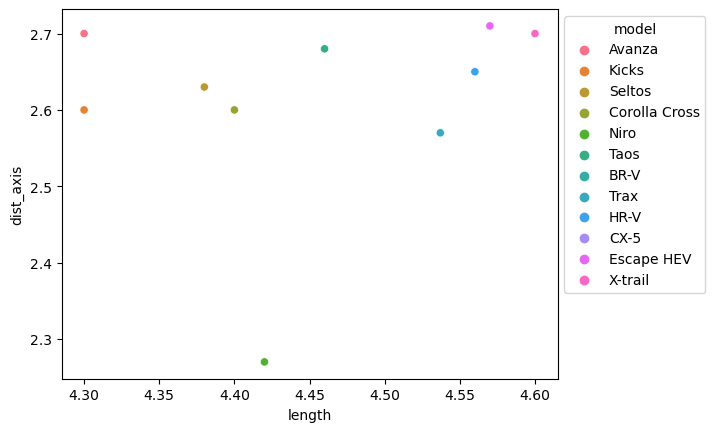

In [66]:
ax = sns.scatterplot(x='length', y='dist_axis', hue='model', data=df_suv_m )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [20]:
df_all_suv = df[df['category'] == 'suv']

In [68]:
df_all_suv[['brand', 'model', 'adult passangers','length','segment_normalized','category']].sort_values(by='length')

,brand,model,adult passangers,length,segment_normalized,category
3,Toyota,Raize,5,4.000,suv_s,suv
84,Kia,Sonet,5,4.110,suv_s,suv
85,Kia,Soul,5,4.190,suv_s,suv
75,VW,T-cross,5,4.190,suv_s,suv
28,Chevrolet,Groove,5,4.200,suv_s,suv
72,VW,Taigun,5,4.220,suv_s,suv
69,VW,Nivus,5,4.260,suv_s,suv
52,Mazda,CX-3,5,4.270,suv_s,suv
29,Chevrolet,Tracker,5,4.270,suv_s,suv
54,Mazda,CX-30,5,4.290,suv_s,suv


In [69]:
df_sedans = df[(df['category'] == 'city') | (df['category'] == 'sedan')]

In [70]:
df_sedans.head()

,brand,model,year,max,min,adult passangers,weight,transmission,fuel,tank,...,cruise_control_advanced,blind_spot_alert,rain_sensor,car_tow,car_pull,body_type,segment,segment_normalized,category,max_price
0,Toyota,Yaris,2024,"$388,700","$312,800",5,1035,A/S,Gas,40,...,yes,yes,no,no,NaN,Sedan,Sedan-SmallSize,sed_s,sedan,388700
1,Toyota,Corolla,2024,"$529,900","$419,900",5,1405,A,Gas,50,...,yes,yes,no,no,NaN,Sedan,Sedan-MidSize,sed_m,sedan,529900
2,Toyota,Cambry,2024,"$598,800","$571,900",5,1515,A,Gas,60.6,...,yes,yes,no,no,NaN,Sedan,Sedan-Fullsize*,sedan_f,sedan,598800
12,Toyota,Prius,2024,"$559,000","$484,900",5,1395,A,Gas/Hybrid,43,...,yes,yes,yes,no,no,Sedan,Sedan/MidSize/Hybrid,sed_m,sedan,559000
14,Honda,City,2024,"$463,900","$401,900",5,1140,A,Gas,40,...,yes,yes,no,no,no,Sedan,Sedan-MidSize,sed_m,sedan,463900


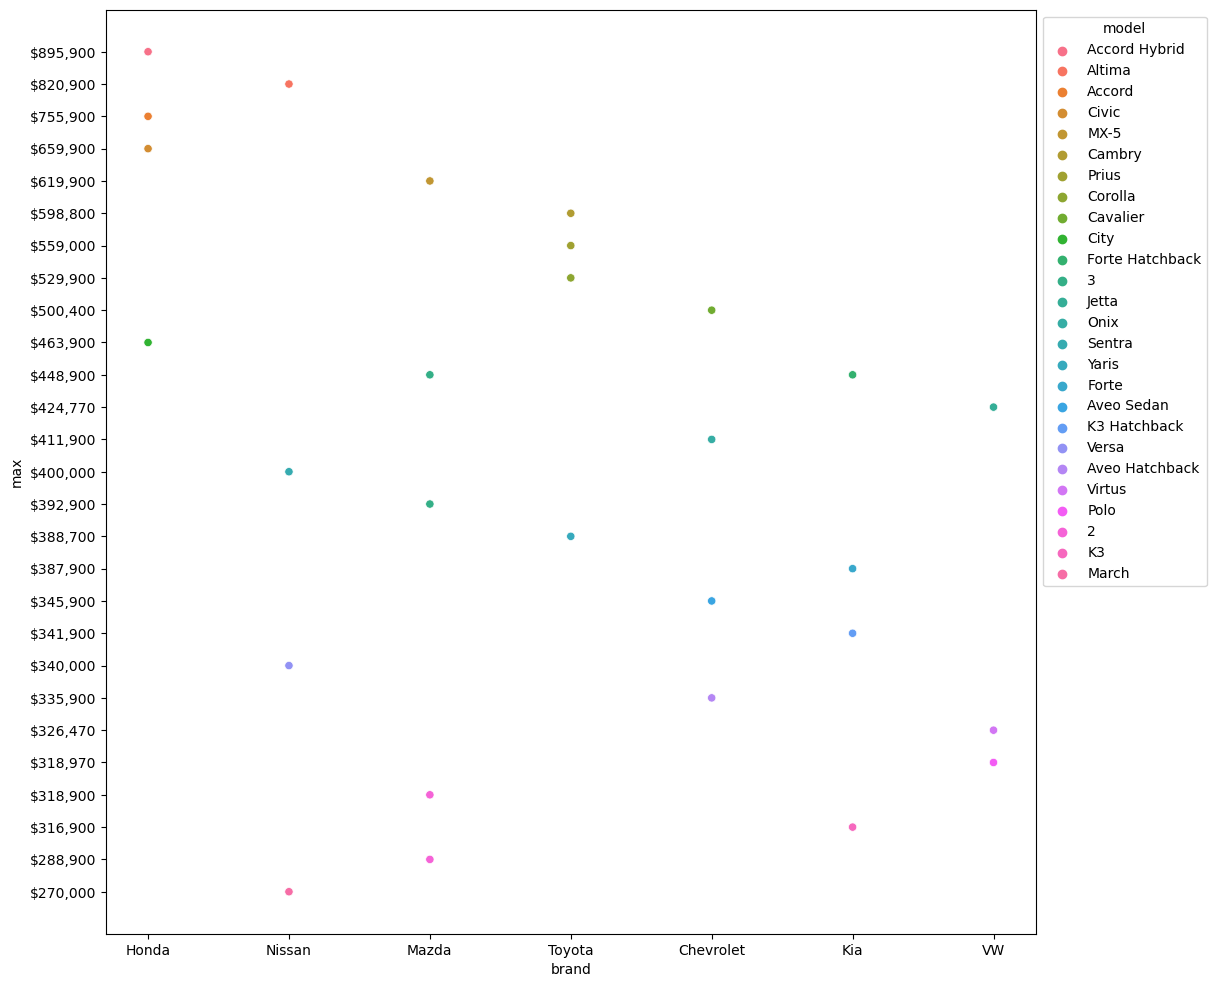

In [71]:
plt.figure(figsize=(12,12))
df_sedans = df_sedans.sort_values(by=['max'], ascending=False)
ax = sns.scatterplot(x='brand',  y='max', hue='model', data=df_sedans )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


In [72]:
df_sedans.columns

Index(['brand', 'model', 'year', 'max', 'min', 'adult passangers', 'weight',
       'transmission', 'fuel', 'tank', 'fuel_consumption', '4x4/awd',
       'big_volume_cargo', 'trunk_size', 'front_break', 'rear_break',
       'braking_assists', 'length', 'width', 'height', 'dist_axis',
       'height_to_the ground', 'front_airbags', 'side_airbags',
       'curtain_air_bags', 'knee_air_bags', 'tire_pressure_monitor', 'NCAP',
       'emergency_brake', 'reverse_camera', 'camera_360', 'bluetooth',
       'android_auto/apple+play', 'cruise_control ', 'cruise_control_advanced',
       'blind_spot_alert', 'rain_sensor', 'car_tow', 'car_pull', 'body_type',
       'segment', 'segment_normalized', 'category', 'max_price'],
      dtype='object')

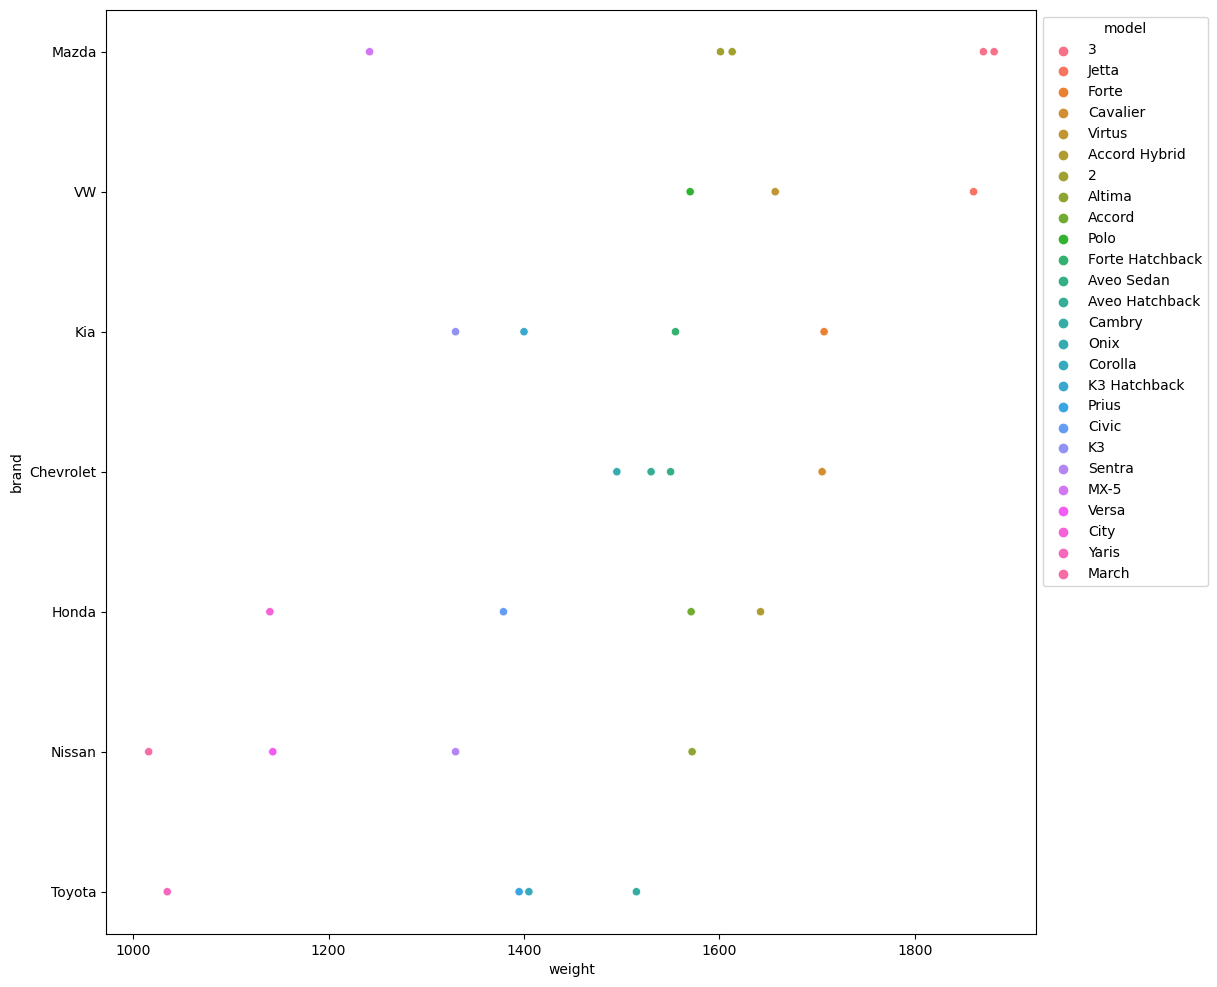

In [73]:
plt.figure(figsize=(12,12))
df_sedans = df_sedans.sort_values(by=['weight'], ascending=False)
ax = sns.scatterplot(  x='weight',y='brand', hue='model', data=df_sedans )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


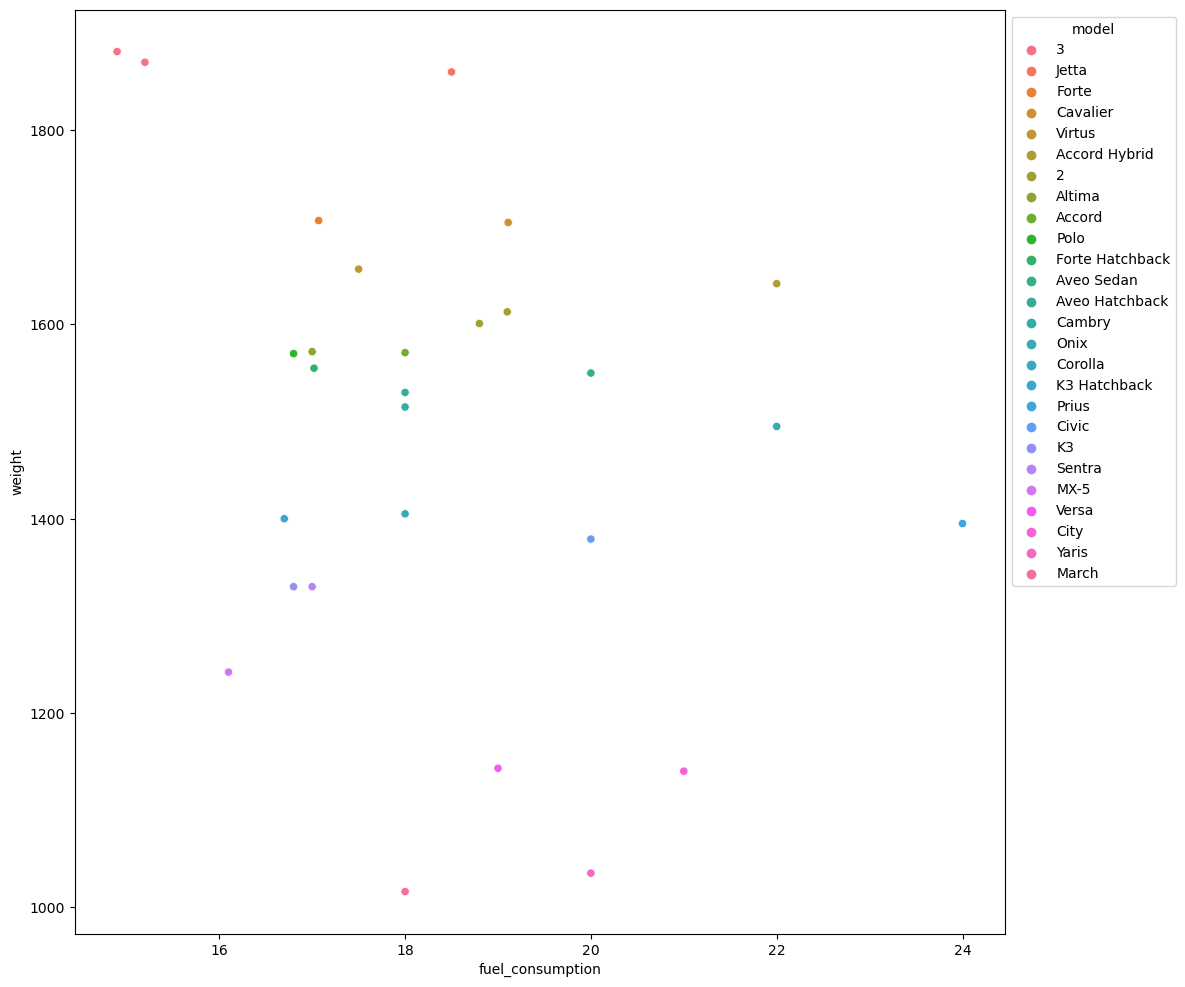

In [74]:
plt.figure(figsize=(12,12))
df_sedans = df_sedans.sort_values(by=['weight'], ascending=False)
ax = sns.scatterplot(x='fuel_consumption', y='weight', hue='model', data=df_sedans )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [75]:
df_sedans.describe()


,year,adult passangers,weight,fuel_consumption,length,width,height,dist_axis
count,28.0,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,23.000000
mean,2024.0,4.892857,1489.607143,18.414286,4.476429,1.791429,1.433857,2.655652
std,0.0,0.566947,232.512738,2.092594,0.282216,0.117842,0.053710,0.096899
min,2024.0,2.000000,1016.000000,14.900000,3.800000,1.600000,1.240000,2.450000
25%,2024.0,5.000000,1366.750000,17.000000,4.385000,1.700000,1.400000,2.600000
50%,2024.0,5.000000,1540.000000,18.000000,4.505000,1.785000,1.450000,2.670000
75%,2024.0,5.000000,1620.250000,19.332500,4.610000,1.800000,1.470000,2.700000
max,2024.0,5.000000,1881.000000,24.000000,4.900000,2.020000,1.528000,2.800000


In [76]:
df_sedans.head()

,brand,model,year,max,min,adult passangers,weight,transmission,fuel,tank,...,cruise_control_advanced,blind_spot_alert,rain_sensor,car_tow,car_pull,body_type,segment,segment_normalized,category,max_price
50,Mazda,3,2024,"$392,900","$542,900",5,1881,A/S,Gas,51,...,yes,yes,yes,no,NaN,Sedan,Sedan-MidSize,sed_m,sedan,392900
51,Mazda,3,2024,"$448,900","$558,900",5,1870,A,Gas,51,...,yes,yes,yes,no,NaN,Hatchback,Sedan-SmallSize,sed_s,sedan,448900
77,VW,Jetta,2024,"$424,770","$549,770",5,1860,A,Gas,50,...,yes,yes,yes,no,no,Sedan,Sedan-Fullsize,sedan_f,sedan,424770
83,Kia,Forte,2024,"$387,900","$541,900",5,1707,A/S,Gas,50,...,no,yes,no,no,no,Sedan,Sedan-MidSize,sed_m,sedan,387900
27,Chevrolet,Cavalier,2024,"$500,400","$440,900",5,1705,A,Gas,44,...,no,no,no,no,no,Sedan,Sedan-MidSize,sed_m,sedan,500400


In [77]:
df_sedans.groupby(['segment_normalized'])['fuel_consumption'].mean()

segment_normalized
city       17.400000
sed_m      18.400000
sed_s      19.216667
sedan_f    18.700000
Name: fuel_consumption, dtype: float64

In [78]:
df_groupby_mean = df.groupby(['segment_normalized'])['fuel_consumption'].mean()
df_groupby_mean.sort_values()

segment_normalized
pu_f          8.962500
pu_m         10.968750
suv_xl       11.466364
Not found    12.500000
suv_f        15.727273
mini_van     16.500000
pu_s         16.800000
suv_s        16.957000
city         17.400000
suv_m        17.606667
sed_m        18.400000
sedan_f      18.700000
sed_s        19.216667
Name: fuel_consumption, dtype: float64

In [79]:
df_groupby_mean = df.groupby(['segment_normalized'])['length'].mean()
df_groupby_mean.sort_values()

segment_normalized
city         4.041667
suv_s        4.200000
sed_s        4.425000
suv_m        4.465583
pu_s         4.565667
sed_m        4.573636
suv_f        4.707083
sedan_f      4.846000
Not found    5.050000
suv_xl       5.128364
mini_van     5.150000
pu_m         5.251625
pu_f         5.886250
Name: length, dtype: float64

In [80]:
df_groupby_mean = df.groupby(['segment_normalized'])['max_price'].mean()
df_groupby_mean.sort_values()

segment_normalized
city               367595.0
sed_s         370716.666667
suv_s              432821.0
pu_s          440746.666667
sed_m         453288.181818
suv_m         563289.166667
sedan_f            699254.0
pu_m               807650.0
suv_f         860655.833333
mini_van          1131450.0
suv_xl       1322806.363636
Not found         1349000.0
pu_f              1619150.0
Name: max_price, dtype: object

In [ ]:
df